In [31]:
import os
import importlib
import os
from logging import exception

import matplotlib.pyplot as plt
import numpy as np


# Set environment variables
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data_base/CDM_all.db'
os.environ['TANGOS_SIMULATION_FOLDER'] = '/home/bk639/data/CDM_z0'
os.environ['TANGOS_PROPERTY_MODULES'] = 'mytangosproperty'
#add python path /home/bk639/MorphologyMeasurements/Code/tangos
import sys
sys.path.append('/home/bk639/mytangosproperty')
import tangos
sims = tangos.all_simulations()
import mytangosproperty

In [32]:
halo = sims[0].timesteps[0].halos[1]
print(halo)

<Halo 'cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/halo_2' | NDM=1390927 Nstar=55462 Ngas=431672>


In [33]:
halo['isophote_parameters']

[[[np.float64(244.62849265107909),
   np.float64(0.26062977825951394),
   np.float64(0.03283407864758936),
   np.float64(0.08778994134047952),
   np.float64(502.1636170090339),
   np.float64(521.6991483974912)],
  [np.float64(271.80943627897676),
   np.float64(0.26062977825951394),
   np.float64(0.03283407864758936),
   np.float64(0.095472064082261),
   np.float64(502.1636170090339),
   np.float64(521.6991483974912)],
  [np.float64(298.9903799068744),
   np.float64(0.26062977825951394),
   np.float64(0.03283407864758936),
   np.float64(0.06185073737658446),
   np.float64(502.1636170090339),
   np.float64(521.6991483974912)],
  [np.float64(326.1713235347721),
   np.float64(0.26062977825951394),
   np.float64(0.03283407864758936),
   np.float64(0.05856017129865156),
   np.float64(502.1636170090339),
   np.float64(521.6991483974912)],
  [np.float64(353.3522671626698),
   np.float64(0.26062977825951394),
   np.float64(0.03283407864758936),
   np.float64(0.06229232085721742),
   np.float64(

In [34]:
sims[0].timesteps[0]

<TimeStep 'cptmarvel.cosmo25cmb.4096g5HbwK1BH/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096/cptmarvel.cosmo25cmb.4096g5HbwK1BH.004096' z=-0.00 t=13.73 Gyr>

In [6]:
halo.keys()

['#ID',
 'numSubStruct',
 'Mvir',
 'npart',
 'Xc',
 'Yc',
 'Zc',
 'VXc',
 'VYc',
 'VZc',
 'Rvir',
 'Rmax',
 'r2',
 'mbp_offset',
 'com_offset',
 'Vmax',
 'v_esc',
 'sigV',
 'lambda',
 'lambdaE',
 'Lx',
 'Ly',
 'Lz',
 'b',
 'c',
 'Eax',
 'Eay',
 'Eaz',
 'Ebx',
 'Eby',
 'Ebz',
 'Ecx',
 'Ecy',
 'Ecz',
 'ovdens',
 'nbins',
 'fMhires',
 'Ekin',
 'Epot',
 'SurfP',
 'Phi0',
 'cNFW',
 'n_gas',
 'M_gas',
 'lambda_gas',
 'lambdaE_gas',
 'Lx_gas',
 'Ly_gas',
 'Lz_gas',
 'b_gas',
 'c_gas',
 'Eax_gas',
 'Eay_gas',
 'Eaz_gas',
 'Ebx_gas',
 'Eby_gas',
 'Ebz_gas',
 'Ecx_gas',
 'Ecy_gas',
 'Ecz_gas',
 'Ekin_gas',
 'Epot_gas',
 'n_star',
 'M_star',
 'lambda_star',
 'lambdaE_star',
 'Lx_star',
 'Ly_star',
 'Lz_star',
 'b_star',
 'c_star',
 'Eax_star',
 'Eay_star',
 'Eaz_star',
 'Ebx_star',
 'Eby_star',
 'Ebz_star',
 'Ecx_star',
 'Ecy_star',
 'Ecz_star',
 'Ekin_star',
 'Epot_star',
 'n_gas',
 'n_star',
 'n_dm',
 'halo_images',
 'image_reffs',
 'image_orientations',
 'Rhalf',
 'childHalo',
 'childHalo',
 '

In [35]:
#function to plot isophotes on images
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_isophotes(images,isophote_params,orientations,reffs,rhalf,filename):
    #72 images, 72 isophote_params, 72 orientations
    extent = 9*rhalf #in kpc
    kpc_per_pixel = extent / images[0].shape[0]
    images_3d = np.array(images)

    
    fig, axs = plt.subplots(6, 12, figsize=(30, 15))
    fig.patch.set_facecolor('black')  # Set the figure background color
    
    axs = axs.flatten()
    ellipse_dict = {}
    center = (images[0].shape[0]//2,images[0].shape[1]//2)
    for i in range(len(images)):
        #print(orientations[i])
        
        vmin = np.min(images[i])
        # if vmin < 0.1:
        #     vmin = 0.1
        axs[i].imshow(np.log10(images[i]), cmap='magma', origin='lower',vmin=vmin)
        reff = reffs[i]
        #convert reff to pixels 
        reff = reff / kpc_per_pixel
        
        #plot isophotes
        iso_params = isophote_params[i]
        
        smas,epss,pas,grad_errs,x0s,y0s = [],[],[],[],[],[]
        
        for j in range(len(iso_params)):
            sma,eps,pa,grad_err,x0,y0 = iso_params[j]
            #print(sma,eps,pa,grad_err,x0,y0)
            if grad_err < 0.15:
                smas.append(sma)
                epss.append(eps)
                pas.append(pa)
                grad_errs.append(grad_err)
                x0s.append(x0) #remove center addition later
                y0s.append(y0)
            
            
        ellipses = np.ones(4)*np.nan    
        for k in [2,3,4]:
            #boolean filter for grad_err <0.1


            #find index of sma closest to j*reff      
            try:
                idx = (np.abs(np.array(smas) - k*reff)).argmin()
            except:
                print(f"Available smas: {smas}")
                continue

            sma = smas[idx]

            #if sma is far, print
            # if np.abs(sma - k*reff) > 0.3*reff:
            #     print(f'smas: {sma:.2f}, reff: {k*reff:.2f}')
            eps = epss[idx]
            pa = pas[idx]
            grad_err = grad_errs[idx]
            x0 = x0s[idx]
            y0 = y0s[idx]
            #print(idx,sma,eps,pa,grad_err,x0,y0)
            center_offset = np.sqrt((images[i].shape[0]//2 - x0)**2 + (images[i].shape[1]//2 - y0)**2)
            #plot ellipse
                        
            #get ellipse parameters
            #color by gradient error
            vmin = 0
            vmax = 0.15
            #create colormap
            norm = plt.Normalize(vmin=vmin, vmax=vmax)
            cmap = plt.cm.winter
            #if center_offset < 100:
            #print(sma,eps,pa,grad_err)
            #distance in pixels from 0.1kpc
            d = 0.5/kpc_per_pixel * reff

            if (center_offset < d) and (grad_err <0.3):
                ellipse = Ellipse((x0, y0), 2 * sma, 2 * sma * (1 - eps), angle=np.degrees(pa), edgecolor=cmap(norm(grad_err)), facecolor='none')
                axs[i].add_patch(ellipse)
                ellipses[k-2] = eps
            else: 
                ellipses[k-2] = np.nan

        #save ellipses to dict
        ellipse_dict[orientations[i]] = ellipses


        axs[i].axis('off')
        axs[i].set_aspect('equal')
        axs[i].set_title(f'{orientations[i]}', color='white', y=0.85)
    #reduce white space
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(filename, bbox_inches='tight', pad_inches=.1, dpi=150)
    #plt.close(fig)
    return ellipse_dict
    


In [36]:

import pickle
import os
import numpy as np

# Define pickle filename using a consistent pattern
pickle_filename = 'ellipse_data.pickle'

# Check if pickle file exists and load it if it does
if os.path.exists(pickle_filename):
    with open(pickle_filename, 'rb') as f:
        ellipse_dict = pickle.load(f)
    print(f"Loaded existing data from {pickle_filename}")
else:
    ellipse_dict = {}
    print(f"Starting with fresh data")
    
ellipse_dict = {}


Loaded existing data from ellipse_data.pickle


In [37]:
sims = sims[0:1]

In [38]:
sims

[<Simulation("cptmarvel.cosmo25cmb.4096g5HbwK1BH")>]

Simulation cptmarvel.cosmo25cmb.4096g5HbwK1BH
0
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Available smas: []
Av

KeyboardInterrupt: 

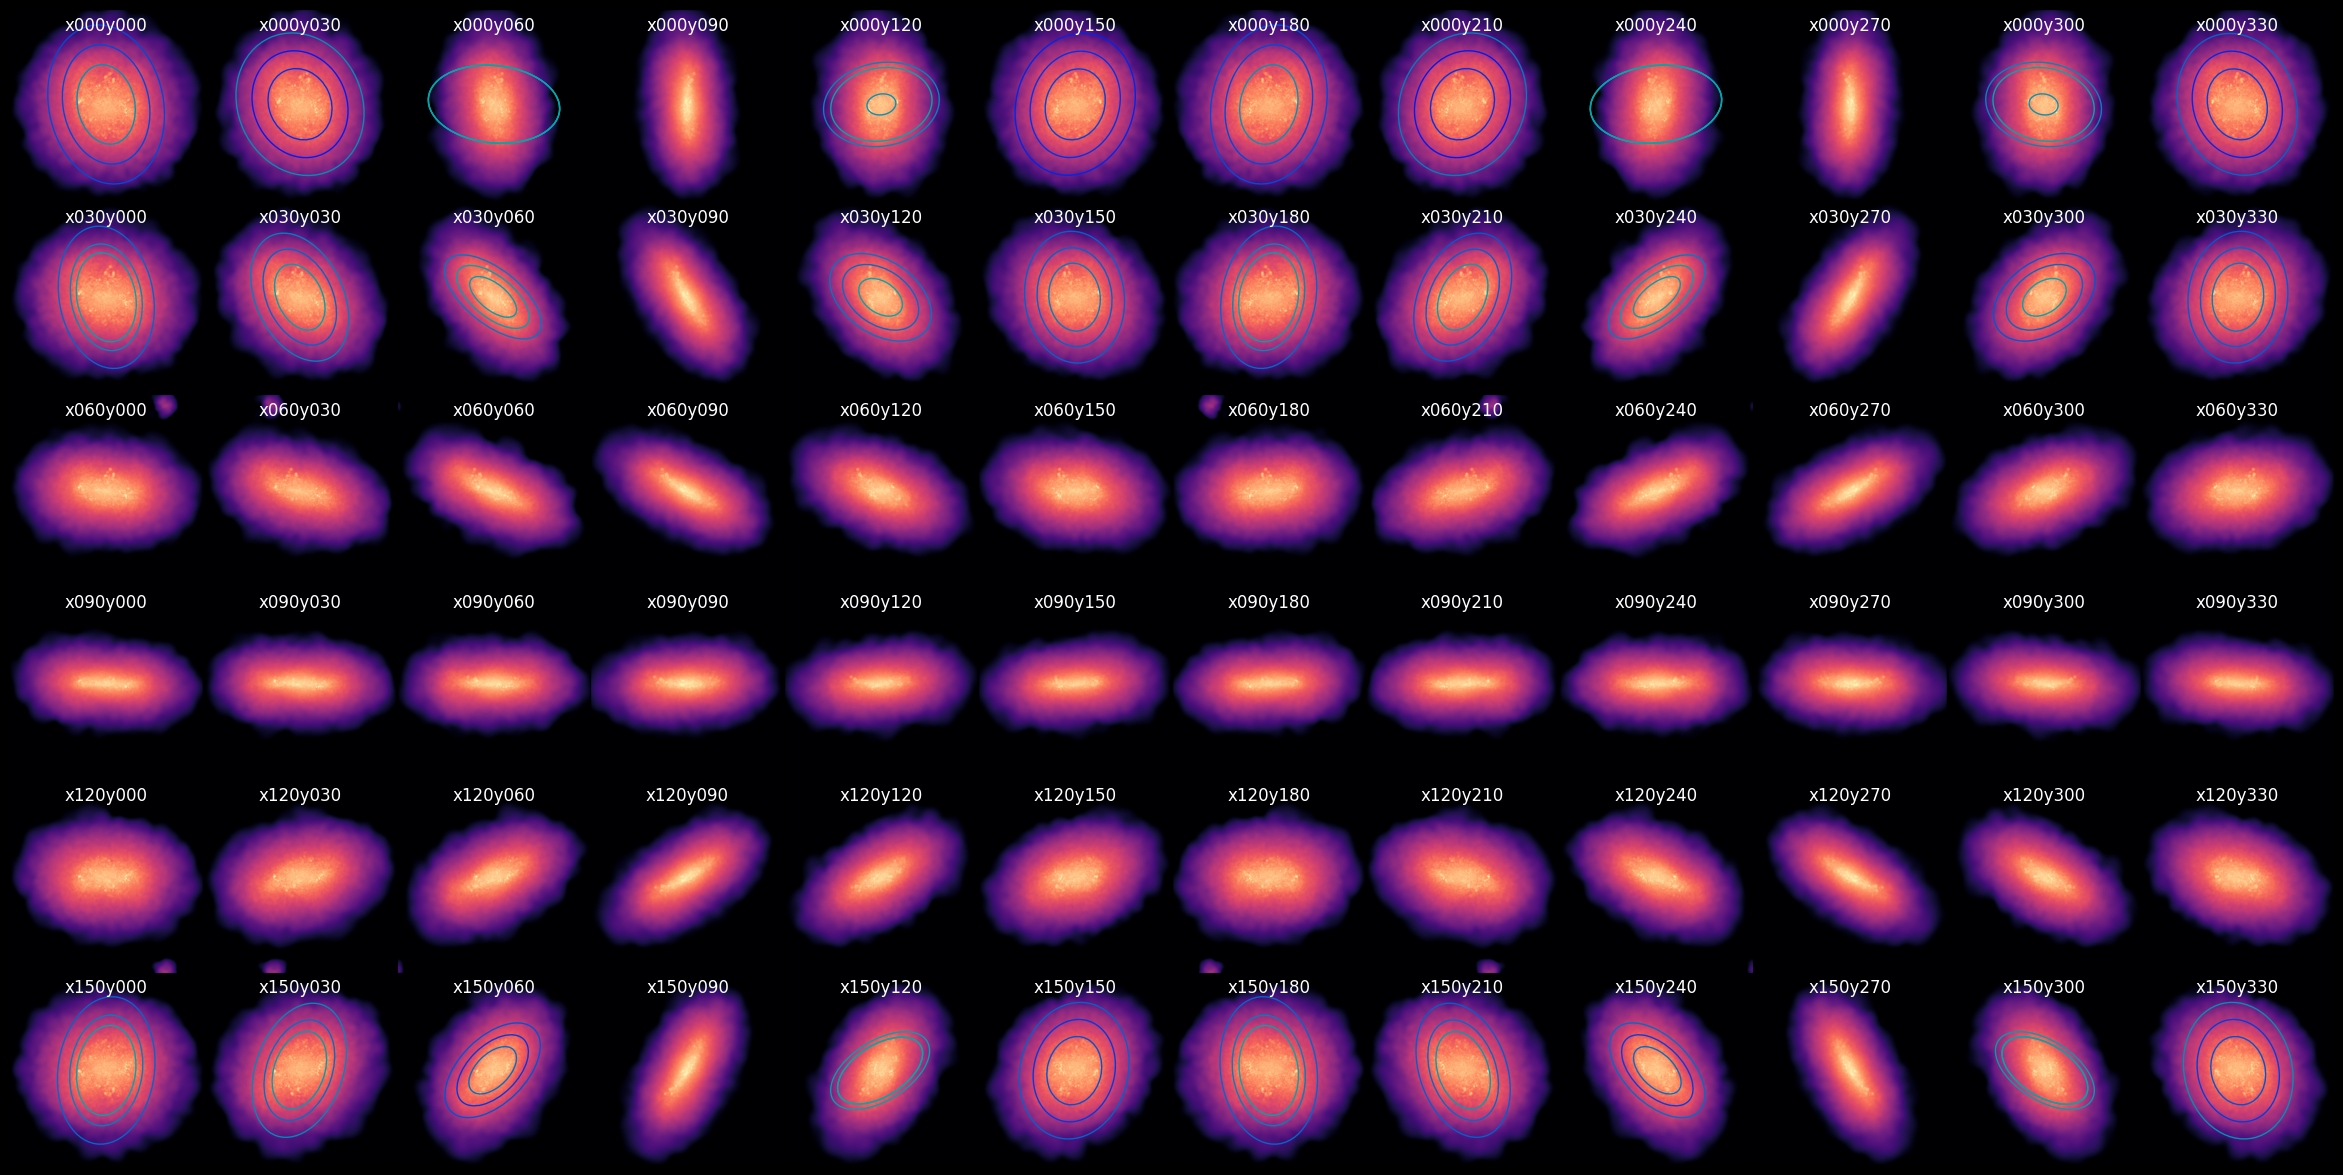

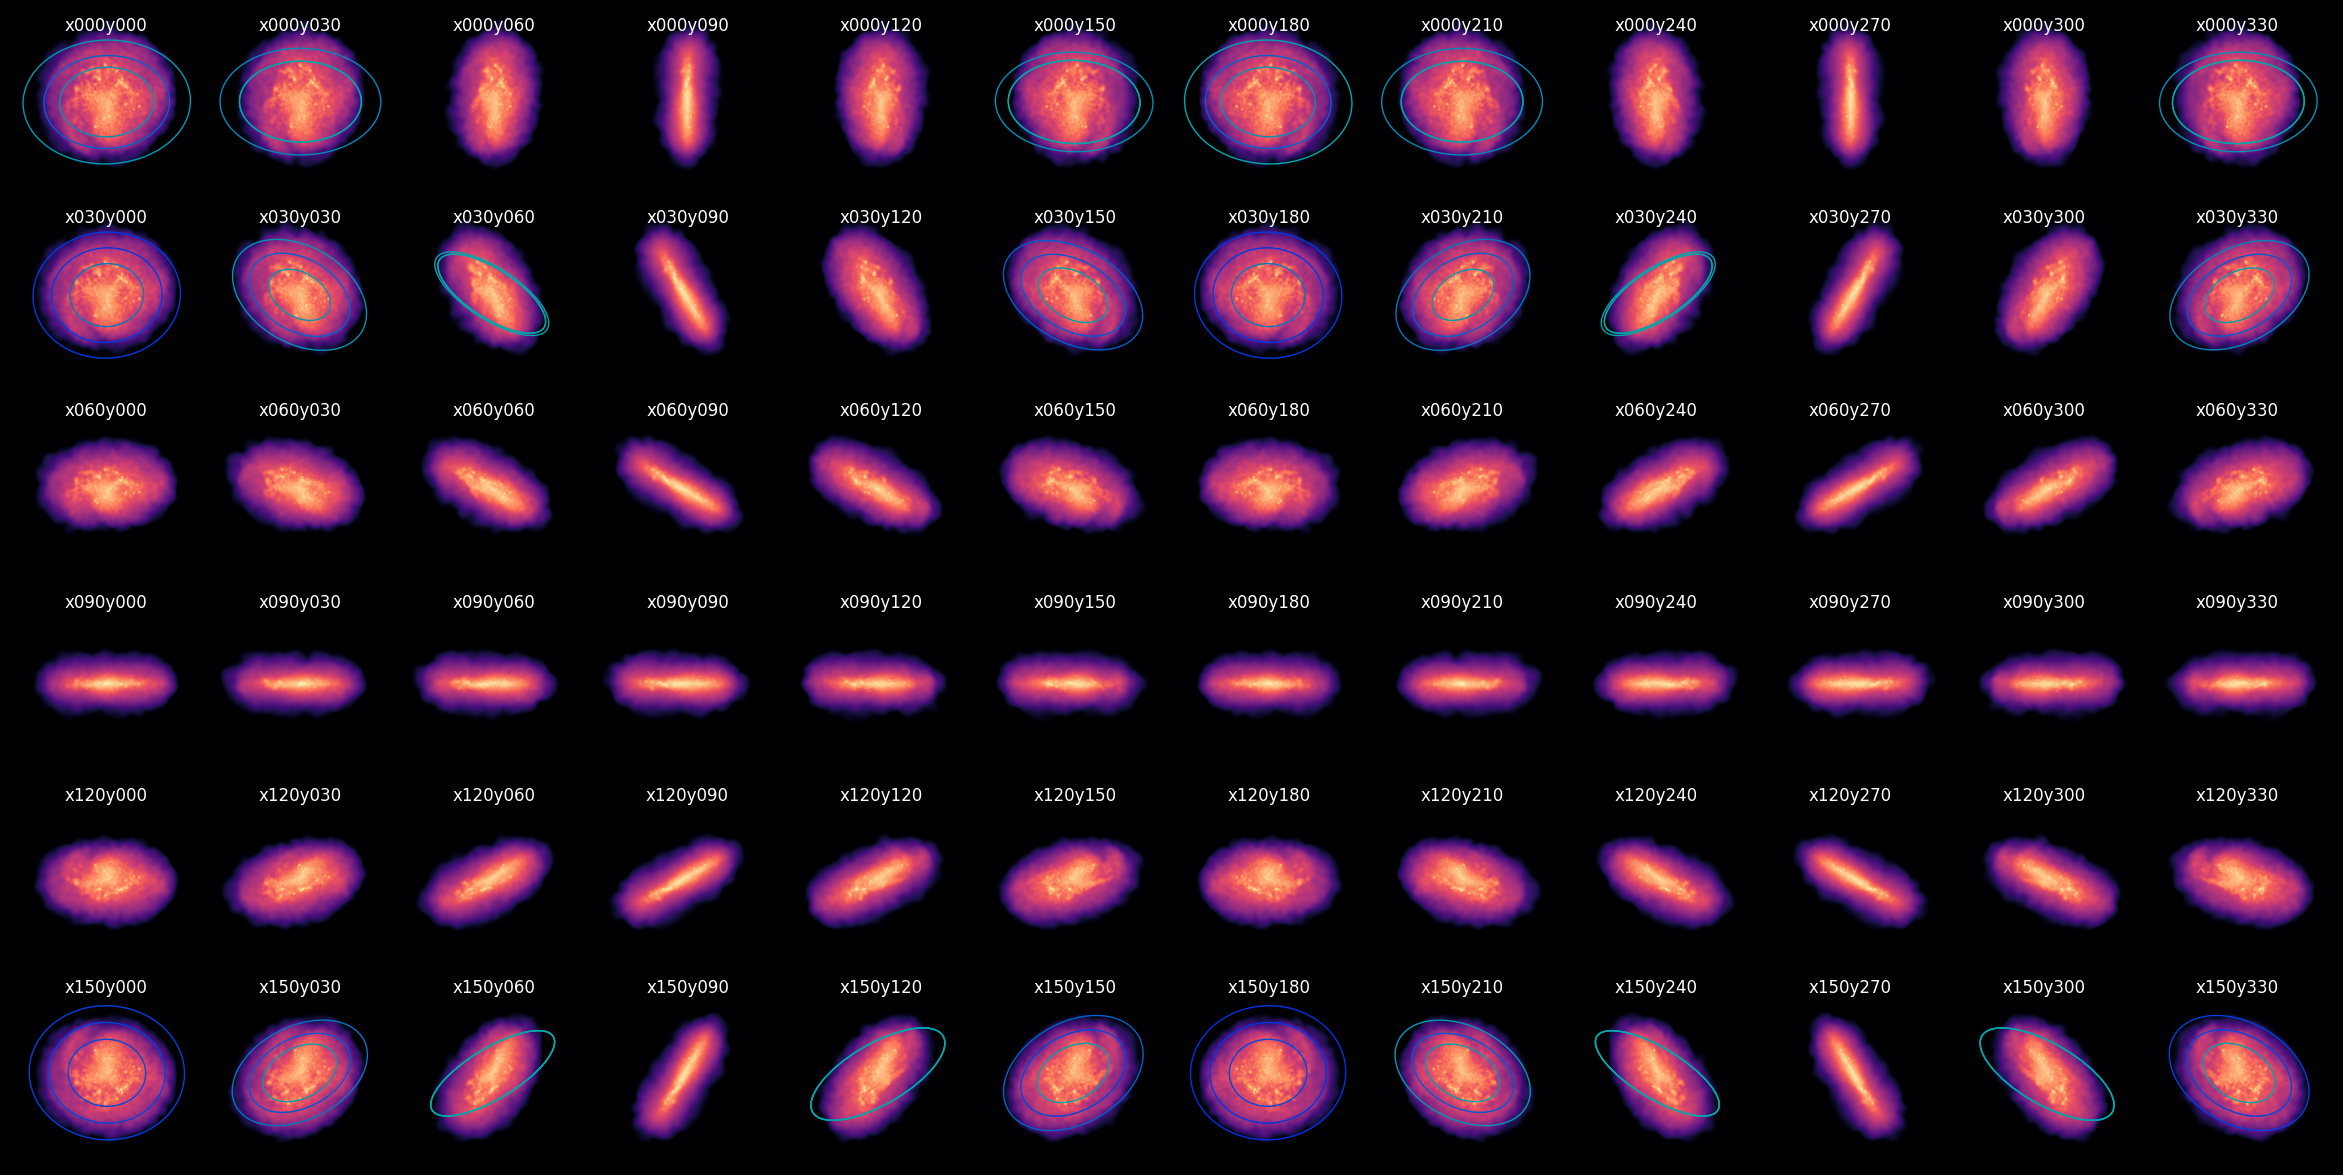

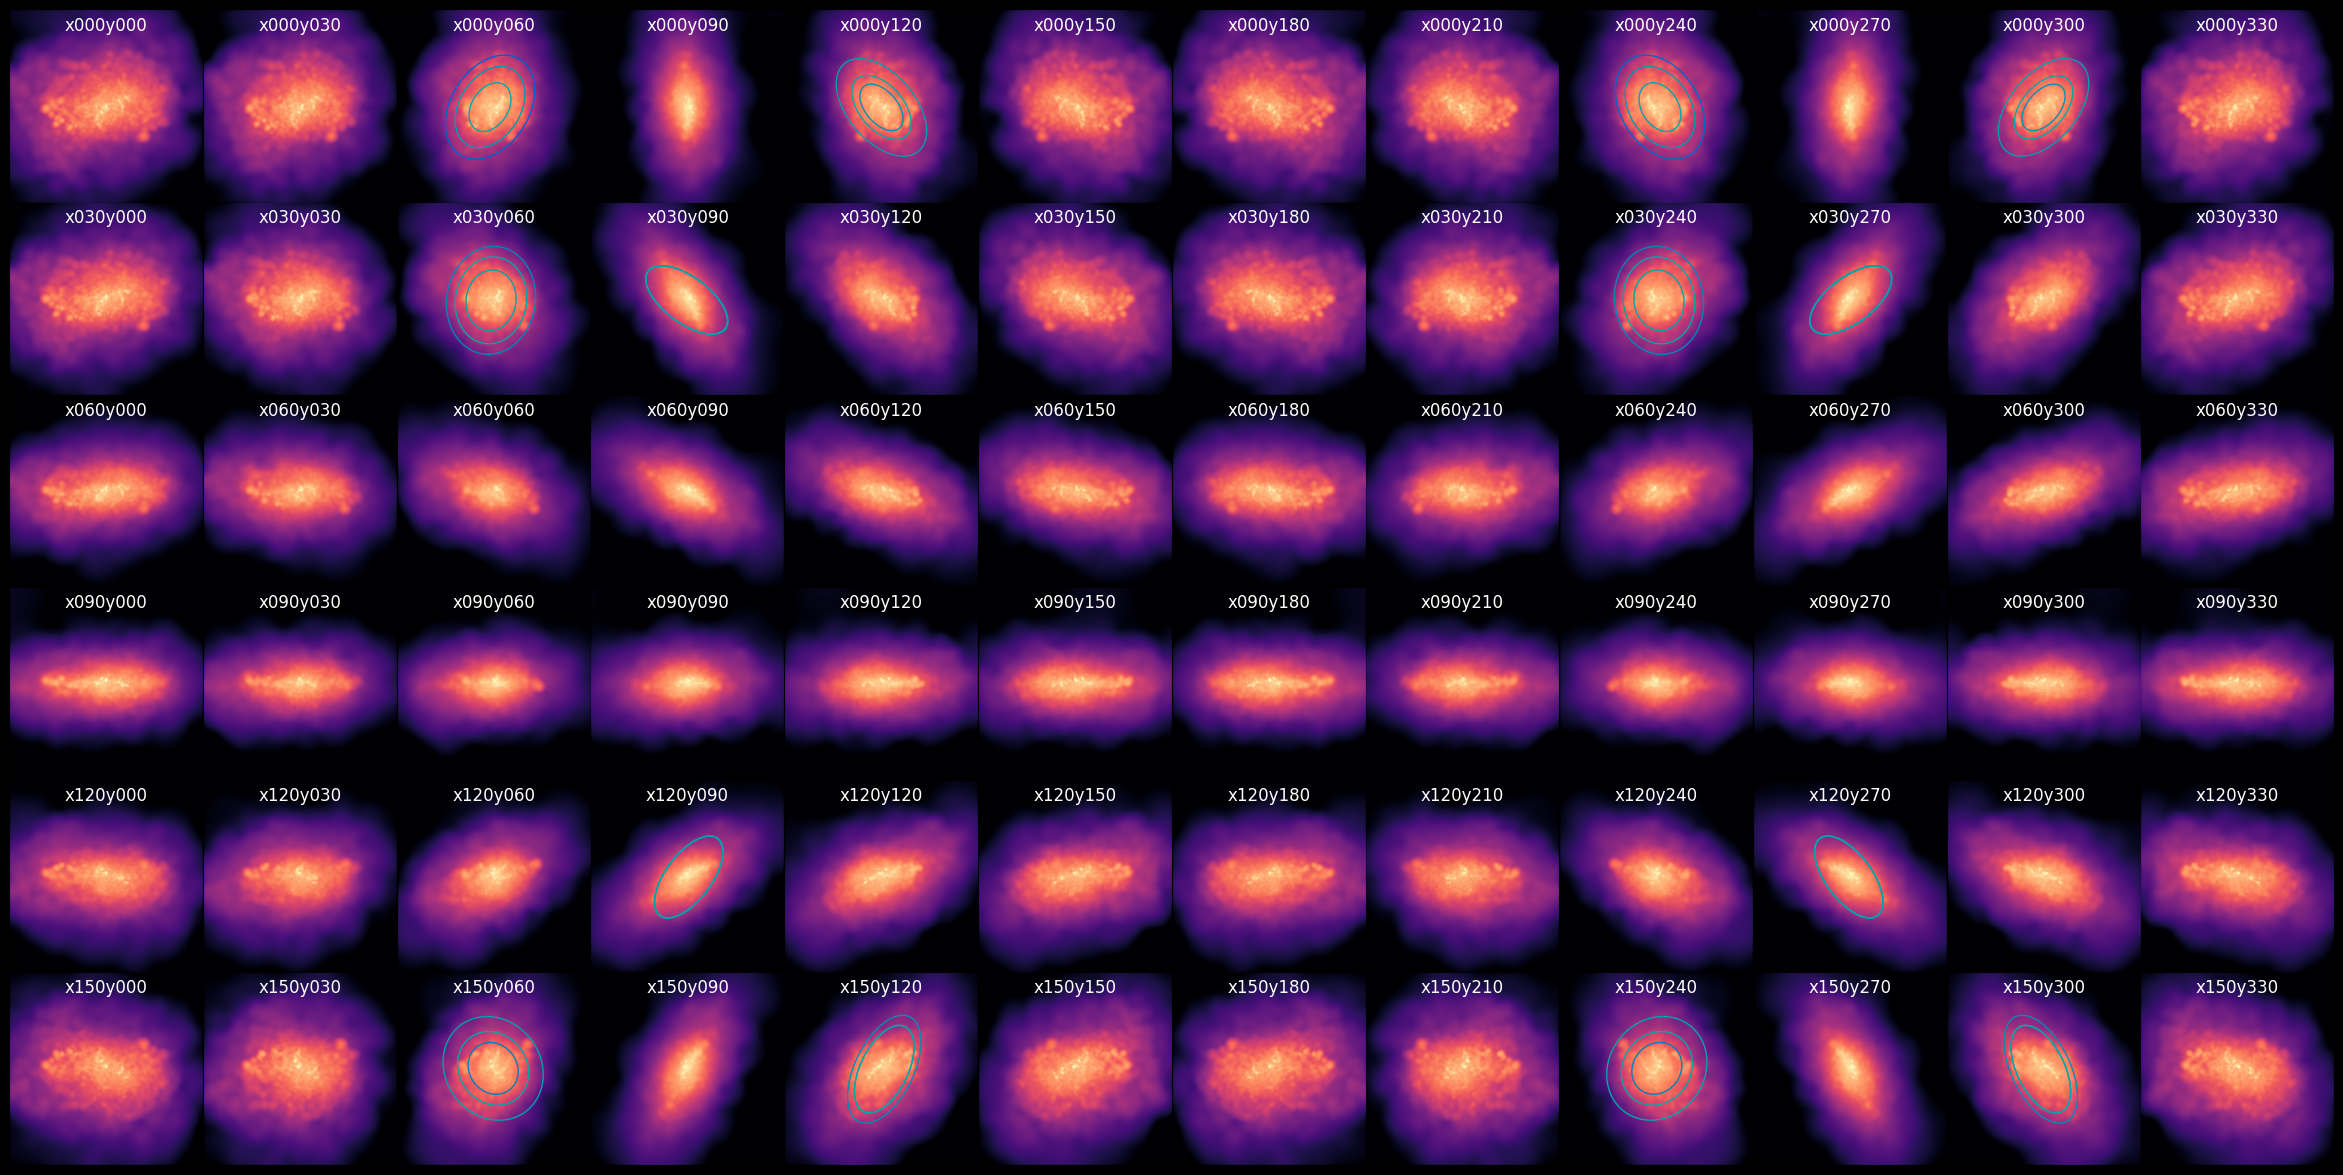

In [39]:

for sim in sims:
    sim_name = str(sim.basename)
    print(f"Simulation {sim_name}")

    # Initialize dictionary for this sim if it doesn't exist
    if sim_name not in ellipse_dict:
        ellipse_dict[sim_name] = {}


    if len(sim.timesteps) > 1:
        timestep = sim.timesteps[-1]
    elif len(sim.timesteps) == 1:
        timestep = sim.timesteps[0]
    halos = timestep.halos[:100]

    for hid in range(len(halos)):
        # Skip if we've already processed this halo
        if hid in ellipse_dict[sim_name].keys():
            print(f"Skipping halo {hid} - already processed")
            continue
        try:
            halo = halos[hid]
            #print(halo['n_star'][0])
            if halo['n_star'][0] < 4000:
                continue
            print(hid)
            #get images and isophote
            halo_images = halo['halo_images']
            image_reffs = halo['image_reffs']
            image_orientations = halo['image_orientations']
            Rhalf = halo['Rhalf']
            isophote_params = halo['isophote_parameters']
            reffs = np.array(image_reffs)
            #print(np.min(reffs),np.max(reffs),np.mean(reffs),np.std(reffs))
            filename = ('figures/' + str(sim.basename) +'.'+ str(hid)+ '.isophotes.png')
            halo_dict = plot_isophotes(halo_images,isophote_params,image_orientations,reffs,Rhalf,filename)
            #save to folder figures

            ellipse_dict[sim_name][hid] = halo_dict
            #extract values out of halo_dict, list of length len(orientaions) containg a list of ellipse values of length 4
            ellipses = []
            for orientation in image_orientations:
                ellipses.append(halo_dict[orientation])
            print(ellipses)


            #halo['ellipses'] = ellipses

            # Save to pickle file after each halo is processed
            with open(pickle_filename, 'wb') as f:
                pickle.dump(ellipse_dict, f)
            print(f"Saved data to {pickle_filename} after processing halo {hid}")
            

            #print(halo['isophote_parameters'])

        except KeyError:
            #continue
            print('No isophote parameters')
        
    



In [10]:
ellipse_dict['cptmarvel.cosmo25cmb.4096g5HbwK1BH'][0]

{'x000y000': array([0.1, 0.1, 0.1, nan]),
 'x000y030': array([0.1, 0.1, 0.1, nan]),
 'x000y060': array([0.1, 0.1, 0.1, nan]),
 'x000y090': array([0.1, 0.1, 0.1, nan]),
 'x000y120': array([0.1, 0.1, 0.1, nan]),
 'x000y150': array([0.1, 0.1, 0.1, nan]),
 'x000y180': array([0.1, 0.1, 0.1, nan]),
 'x000y210': array([0.1, 0.1, 0.1, nan]),
 'x000y240': array([0.1, 0.1, 0.1, nan]),
 'x000y270': array([0.1, 0.1, 0.1, nan]),
 'x000y300': array([0.1, 0.1, 0.1, nan]),
 'x000y330': array([0.1, 0.1, 0.1, nan]),
 'x030y000': array([0.1, 0.1, 0.1, nan]),
 'x030y030': array([0.1, 0.1, 0.1, nan]),
 'x030y060': array([0.1, 0.1, 0.1, nan]),
 'x030y090': array([0.1, 0.1, 0.1, nan]),
 'x030y120': array([0.1, 0.1, 0.1, nan]),
 'x030y150': array([0.1, 0.1, 0.1, nan]),
 'x030y180': array([0.1, 0.1, 0.1, nan]),
 'x030y210': array([0.1, 0.1, 0.1, nan]),
 'x030y240': array([0.1, 0.1, 0.1, nan]),
 'x030y270': array([0.1, 0.1, 0.1, nan]),
 'x030y300': array([0.1, 0.1, 0.1, nan]),
 'x030y330': array([0.1, 0.1, 0.1,

In [108]:
import numpy as np
import pickle
from scipy.interpolate import LinearNDInterpolator, NearestNDInterpolator, Rbf

def interpolate_orientations(halo_ellipses, reff_multipliers=[2, 3, 4],
                             interpolation_method='linear', coordinate_system='angles'):
    """
    Function that interpolates ellipticity values for arbitrary viewing angles.
    Handles periodic boundary conditions.
    """
    # Function to extract angles from orientation string
    def parse_orientation(orientation):
        try:
            x_angle = int(orientation[1:4])  # Rotation around x-axis in degrees
            y_angle = int(orientation[5:8])  # Rotation around y-axis in degrees
            return x_angle, y_angle
        except (ValueError, IndexError):
            print(f"Invalid orientation format: {orientation}")
            return None, None

    # Function to convert angles to 3D unit vector if using vector coordinates
    def angles_to_vector(x_angle, y_angle):
        x_rad = np.radians(x_angle)
        y_rad = np.radians(y_angle)

        # Start with vector pointing along z-axis (0, 0, -1)
        # Rotate around y-axis (affects x and z)
        vx = np.sin(y_rad)
        vy = 0
        vz = -np.cos(y_rad)

        # Rotate around x-axis (affects y and z)
        new_vy = vy * np.cos(x_rad) - vz * np.sin(x_rad)
        new_vz = vy * np.sin(x_rad) + vz * np.cos(x_rad)

        return [vx, new_vy, new_vz]

    # Prepare data points and values with periodic boundary handling
    original_points = []
    extended_points = []  # Will include periodic boundary points
    original_values = {i: [] for i in range(len(reff_multipliers))}
    extended_values = {i: [] for i in range(len(reff_multipliers))}

    # First collect all original data points
    for orientation, ellipticities in halo_ellipses.items():
        # Skip non-orientation keys
        if not (orientation.startswith('x') and 'y' in orientation):
            continue

        x_angle, y_angle = parse_orientation(orientation)
        if x_angle is None:
            continue

        # Store original point
        if coordinate_system == 'vectors':
            point = angles_to_vector(x_angle, y_angle)
        else:  # 'angles' is default
            point = [x_angle, y_angle]

        original_points.append(point)

        # Store original ellipticity values
        for i, eps in enumerate(ellipticities):
            if i < len(reff_multipliers):
                original_values[i].append(float(eps))

    # Now create extended dataset with periodic boundaries
    extended_points = original_points.copy()
    for i in range(len(reff_multipliers)):
        extended_values[i] = original_values[i].copy()

    # Handle periodicity by adding mirrored points
    if coordinate_system == 'angles':
        for idx, point in enumerate(original_points):
            x_angle, y_angle = point

            # Add points for x-periodicity (0° = 180°)
            if x_angle == 0:
                new_point = [180, y_angle]
                extended_points.append(new_point)
                for i in range(len(reff_multipliers)):
                    extended_values[i].append(original_values[i][idx])
            elif x_angle == 180:
                new_point = [0, y_angle]
                extended_points.append(new_point)
                for i in range(len(reff_multipliers)):
                    extended_values[i].append(original_values[i][idx])

            # Add points for y-periodicity (0° = 360°)
            if y_angle == 0:
                new_point = [x_angle, 360]
                extended_points.append(new_point)
                for i in range(len(reff_multipliers)):
                    extended_values[i].append(original_values[i][idx])
            elif y_angle == 360 or y_angle == 359:
                new_point = [x_angle, 0]
                extended_points.append(new_point)
                for i in range(len(reff_multipliers)):
                    extended_values[i].append(original_values[i][idx])

            # Add points for corner cases
            if (x_angle == 0 and y_angle == 0):
                new_point = [180, 360]
                extended_points.append(new_point)
                for i in range(len(reff_multipliers)):
                    extended_values[i].append(original_values[i][idx])
            elif (x_angle == 180 and y_angle == 0):
                new_point = [0, 360]
                extended_points.append(new_point)
                for i in range(len(reff_multipliers)):
                    extended_values[i].append(original_values[i][idx])
            elif (x_angle == 0 and (y_angle == 360 or y_angle == 359)):
                new_point = [180, 0]
                extended_points.append(new_point)
                for i in range(len(reff_multipliers)):
                    extended_values[i].append(original_values[i][idx])
            elif (x_angle == 180 and (y_angle == 360 or y_angle == 359)):
                new_point = [0, 0]
                extended_points.append(new_point)
                for i in range(len(reff_multipliers)):
                    extended_values[i].append(original_values[i][idx])

    #filter out nan data points:
    # Filter out NaN values before creating interpolators
    for i in range(len(reff_multipliers)):
        if len(extended_values[i]) == 0:
            continue

        # Convert to numpy arrays for efficient filtering
        points_array = np.array(extended_points)
        values_array = np.array(extended_values[i])

        # Create boolean mask for non-NaN values
        valid_mask = ~np.isnan(values_array)

        # Apply mask to filter out NaN values
        points_array = points_array[valid_mask]
        values_array = values_array[valid_mask]

        # Store the filtered arrays back for interpolation
        extended_points_filtered = points_array
        extended_values[i] = values_array


    # Create interpolators based on selected method using filtered dataset
    interpolators = {}
    fallback_interpolators = {}
    
    for i in range(len(reff_multipliers)):
        if len(extended_values[i]) == 0:
            continue

        points_array = np.array(extended_points_filtered)
        values_array = np.array(extended_values[i])

        if interpolation_method == 'rbf':
            if coordinate_system == 'vectors':
                interpolators[i] = Rbf(
                    points_array[:, 0], points_array[:, 1], points_array[:, 2],
                    values_array, function='multiquadric'
                )
            else:
                interpolators[i] = Rbf(
                    points_array[:, 0], points_array[:, 1],
                    values_array, function='multiquadric'
                )
        elif interpolation_method == 'nearest':
            interpolators[i] = NearestNDInterpolator(points_array, values_array)
        else:  # 'linear' is default
            interpolators[i] = LinearNDInterpolator(points_array, values_array)
            fallback_interpolators[i] = NearestNDInterpolator(points_array, values_array)

    # Define the interpolation function with periodic boundary handling
    def interpolate(x_angle, y_angle, reff_index=0):
        """
        Estimate ellipticity at arbitrary viewing angles with periodic boundaries.
        """
        # Normalize angles to the periodic domain
        if x_angle > 180:
            x_angle = x_angle % 180
        if y_angle > 360:
            y_angle = y_angle % 360

        if reff_index not in interpolators:
            raise ValueError(f"No data for reff_index {reff_index} (multiplier={reff_multipliers[reff_index]})")

        # Interpolate based on selected method and coordinate system
        if interpolation_method == 'rbf':
            if coordinate_system == 'vectors':
                vx, vy, vz = angles_to_vector(x_angle, y_angle)
                return float(interpolators[reff_index](vx, vy, vz))
            else:
                return float(interpolators[reff_index](x_angle, y_angle))
        else:
            if coordinate_system == 'vectors':
                point = angles_to_vector(x_angle, y_angle)
            else:
                point = [x_angle, y_angle]

            result = interpolators[reff_index](point)

            # For linear interpolation, use fallback if out of convex hull
            if interpolation_method == 'linear' and np.isnan(result):
                result = fallback_interpolators[reff_index](point)

            return float(result)

    return interpolate, reff_multipliers

# Loading function remains the same
def load_and_process_halo_data(sim_name=None, halo_id=None, pickle_filename='ellipse_data.pickle'):
    """Load ellipse data from the pickle file for a specific halo."""
    with open(pickle_filename, 'rb') as f:
        ellipse_dict = pickle.load(f)

    if sim_name is None:
        sim_name = list(ellipse_dict.keys())[0]
    if sim_name not in ellipse_dict:
        raise ValueError(f"Simulation '{sim_name}' not found")

    if halo_id is None:
        halo_id = list(ellipse_dict[sim_name].keys())[0]
    if halo_id not in ellipse_dict[sim_name]:
        raise ValueError(f"Halo ID {halo_id} not found")

    return ellipse_dict[sim_name][halo_id]

In [135]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

def plot_ellipticity_comparison(halo_data, interpolate_func, reff_index=0, multiplier=2):
    """
    Plot a comparison of original ellipticity values vs. interpolated values.
    Handles periodic boundary conditions for smooth visualization.
    """
    # Extract original data points and values
    original_x = []
    original_y = []
    original_values = []

    for orientation, ellipticities in halo_data.items():
        if not (orientation.startswith('x') and 'y' in orientation):
            continue

        try:
            x_angle = int(orientation[1:4])
            y_angle = int(orientation[5:8])
            original_x.append(x_angle)
            original_y.append(y_angle)
            original_values.append(float(ellipticities[reff_index]))
        except (ValueError, IndexError, KeyError):
            pass

    # Create grid of interpolated values
    x_angles = np.arange(0, 181, 1)  # Limited from 0 to 180
    y_angles = np.arange(0, 361, 1)  # Limited from 0 to 360
    X, Y = np.meshgrid(x_angles, y_angles)
    Z = np.zeros_like(X, dtype=float)

    # Calculate interpolated values for each grid point
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            try:
                Z[i, j] = interpolate_func(X[i, j], Y[i, j], reff_index)
            except ValueError:
                Z[i, j] = np.nan

    # Find min and max values for consistent color scaling
    all_values = np.concatenate([np.array(original_values), Z.flatten()])
    all_values = all_values[~np.isnan(all_values)]
    vmin = np.min(all_values)
    vmax = np.max(all_values)
    norm = Normalize(vmin=vmin, vmax=vmax)

    # Create the figure
    plt.figure(figsize=(16, 8))
    # Add vertical line at x = 0 with label
    plt.axvline(x=90, color='white', linestyle='--', linewidth=2)
    plt.axhline(y=90, color='white', linestyle='--', linewidth=2)
    plt.axvline(x=270, color='white', linestyle='--', linewidth=2)
    #plt.text(2, 10, 'edge-on', rotation=90, verticalalignment='bottom')
    # Plot the interpolated heatmap
    heatmap = plt.pcolormesh(Y, X, Z, shading='auto', cmap='viridis', norm=norm)
    cbar = plt.colorbar(label='Ellipticity')

    # Overlay original data points with black outlines
    scatter = plt.scatter(original_y, original_x, c=original_values, s=100,
                         edgecolors='black', linewidths=1.5, cmap='viridis',
                         norm=norm, marker='o', zorder=10)

    # Set plot limits exactly as requested
    plt.ylim(0, 180)
    plt.xlim(0, 360)

    # Set ticks every 30 degrees on both axes
    plt.yticks(np.arange(0, 181, 30))
    plt.xticks(np.arange(0, 361, 30))



    # Add labels and title
    plt.xlabel('Y Angle (degrees)', fontsize=12)
    plt.ylabel('X Angle (degrees)', fontsize=12)
    plt.title(f'Ellipticity Values at {multiplier}*Reff', fontsize=14)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f'ellipticity_comparison_{multiplier}Reff.png', dpi=300)

    return plt

In [112]:
halo_data = load_and_process_halo_data(sim_name='cptmarvel.cosmo25cmb.4096g5HbwK1BH',halo_id=0, pickle_filename='ellipse_data.pickle')
# Create interpolation function with default settings
interpolate_func, reff_multipliers = interpolate_orientations(
    halo_data, reff_multipliers=[2],
    interpolation_method='linear',  # Options: 'linear', 'nearest', 'rbf'
    coordinate_system='angles'      # Options: 'angles', 'vectors'
)
# Function to format angles as orientation string
def angle_to_orientation(x_angle, y_angle):
    return f"x{x_angle:03d}y{y_angle:03d}"

# Test interpolation
print("Interpolation test (linear, angles):")
print("Comparing actual data values vs. interpolated values")
print("-" * 50)

for x_angle, y_angle in [(0, 0),(90,180), (0, 330), (150, 0), (150, 330)]:
    print(f"\nx{x_angle:03d}y{y_angle:03d}:")
    orientation = angle_to_orientation(x_angle, y_angle)

    for i, multiplier in enumerate(reff_multipliers):
        if i < len(reff_multipliers):
            try:
                # Get interpolated value
                interpolated = interpolate_func(x_angle, y_angle, i)

                # Check if we have actual data for this orientation
                actual_text = "No actual data"
                if orientation in halo_data:
                    actual = halo_data[orientation][i]
                    actual_text = f"{actual:.4f}"

                    # Calculate difference if actual data exists
                    diff = interpolated - actual
                    diff_percent = (diff / actual) * 100 if actual != 0 else float('inf')

                    print(f"  {multiplier}*Reff:  Actual: {actual_text}  Interpolated: {interpolated:.4f}  " +
                          f"Diff: {diff:.4f} ({diff_percent:.2f}%)")
                else:
                    print(f"  {multiplier}*Reff:  Actual: {actual_text}  Interpolated: {interpolated:.4f}")
            except ValueError as e:
                print(f"  {multiplier}*Reff: Error - {e}")


Interpolation test (linear, angles):
Comparing actual data values vs. interpolated values
--------------------------------------------------

x000y000:
  2*Reff:  Actual: 0.1657  Interpolated: 0.1657  Diff: 0.0000 (0.00%)

x090y180:
  2*Reff:  Actual: 0.8268  Interpolated: 0.8268  Diff: 0.0000 (0.00%)

x000y330:
  2*Reff:  Actual: 0.1032  Interpolated: 0.1032  Diff: 0.0000 (0.00%)

x150y000:
  2*Reff:  Actual: 0.2293  Interpolated: 0.2293  Diff: 0.0000 (0.00%)

x150y330:
  2*Reff:  Actual: 0.1056  Interpolated: 0.1056  Diff: 0.0000 (0.00%)


/tmp/ipykernel_2867456/478111105.py:206: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(result)


/tmp/ipykernel_2867456/478111105.py:206: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(result)


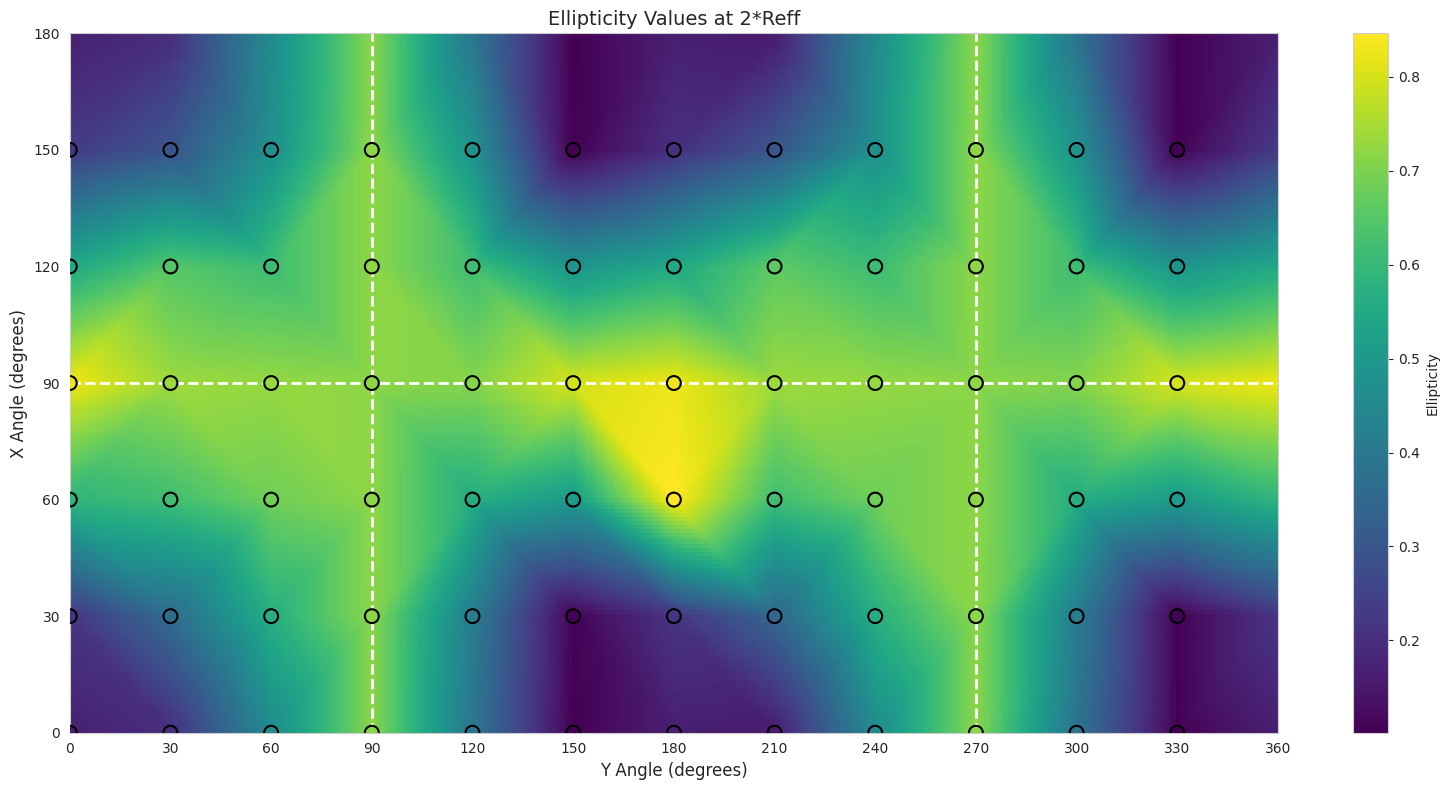

In [136]:



# Create visualization comparing original vs. interpolated values
plot = plot_ellipticity_comparison(halo_data, interpolate_func, reff_index=0, multiplier=reff_multipliers[0])
plt.show()






In [22]:

with open(pickle_filename, 'rb') as f:
    ellipse_dict = pickle.load(f)


    
halos = []
for sim in sims:
    for halo in sim.timesteps[-1].halos:
        if halo['n_star'] > 4000:
            halos.append(halo)
            isophote_params = halo['isophote_parameters'] #list of semi-major axis values, ellipticity, position angle and gradient error for each projection
            # get 'halo_images', 'image_reffs', 'image_orientations','Rhalf'
            halo_images = halo['halo_images']
            image_reffs = halo['image_reffs']
            image_orientations = halo['image_orientations']
            Rhalf = halo['Rhalf']
            # get measure ellipticity values from 'isophote_parameters' at image_reffs
            #store data in a dictionary
            data = {}
            for image,reff,orientation,isophote_param in zip(halo_images,image_reffs,image_orientations,isophote_params):
                print('reff:',reff)
                print('orientation:',orientation)
                sma,eps,pa,grad_err,x0,y0 = isophote_param
                kpc_per_pixel = (6*Rhalf) / halo_images[0].shape[0]
                
                #sma in pixels, get values that are closest to (1,2,3,4)*reff in kpc
                #get indexes of values that are closest to (1,2,3,4)*reff in kpc
                
                #goal: get all ellipse values, that are within 0.1 kpc of (1,2,3,4)*reff from sma
                # then interpolate all of these values on a sphere, so we can approximate projected ellipticity at any angle 
                #conver sma to kpc
                sma_kpc = sma * kpc_per_pixel
                reff = []
                sma,eps,pa,grad_err = [],[],[],[]
                for i in range(1,5):
                    #get closest value to i*reff in sma
                    idx = (np.abs(sma_kpc - i*reff)).argmin()
                    #if within 0.1 kpc
                    if np.abs(sma_kpc[idx] - i*reff) < 0.1:
                        reff.append(i)
                        sma.append(sma_kpc[idx])
                        eps.append(eps[idx])
                        pa.append(pa[idx])
                        grad_err.append(grad_err[idx])
                
                orienation_dict = {'reff':reff,
                                   'orientation':orientation,
                                   'sma':sma,
                                   'eps':eps,
                                   'pa':pa,
                                   'grad_err':grad_err}
                
                data[orientation] = orienation_dict
            

                
            
        


IndentationError: expected an indented block after function definition on line 1 (3819860768.py, line 3)